- (First part based on previous research) films examined for male bias based on scripts/dialogue
    - male character line count, etc
    - and/or number of male characters (“above the line” talent)
- add in rotten tomatoes score for analysis of critical/journalistic/more academic reception 
- add in oscar nominations/wins for analysis of professional/peer reception 
- join these datasets based on movie title and year
- model relationships between these variables (step 1 predictor, steps 2 & 3 response) 

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("future.no_silent_downcasting", True)

In [ ]:
# # Dialogue set from Cornell Movie-Dialogs Corpus
# # For manual result recreation, if necessary

# # Lines data
# lines_raw = pd.read_csv("dialogue/movie_lines.tsv", header=None, names=["raw"])
# lines_split = lines_raw["raw"].str.split("\t", expand=False)

# fixed_rows = []
# for row in lines_split:
#     if len(row) > 5:
#         row = row[:4] + [" ".join(row[4:])]
#     elif len(row) < 5:
#         row += [None] * (5 - len(row))
#     fixed_rows.append(row)

# lines = pd.DataFrame(fixed_rows, columns=["lineID", "characterID", "movieID", "characterName", "text"])

# # Character data
# characters_raw = pd.read_csv("dialogue/movie_characters_metadata.tsv", header=None, names=["raw"])
# characters_split = characters_raw["raw"].str.split("\t", expand=False)

# fixed_rows = []
# for row in characters_split:
#     if len(row) > 6:
#         row = row[:4] + [" ".join(row[4:])]
#     elif len(row) < 6:
#         row += [None] * (6 - len(row))
#     fixed_rows.append(row)

# characters = pd.DataFrame(fixed_rows, columns=["characterID", "characterName", "movieID", "movieTitle", "gender", "creditPosition"])

# # Movie data
# pd_movies = pd.read_csv("dialogue/movie_titles_metadata.tsv", header=None, delimiter="\t", names=["movieID", "title", "year", "imdbRating", "imdbVotes", "genres"])

# # recreate gender analysis:
# # lines: break down to tokens/word count
# # aggregate number of lines/rows per character
# # join on chars 
# # agg per movie based on char gender

In [ ]:
# Using NLTK to tokenize text
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# lines["tokens"] = lines["text"].apply(lambda x: word_tokenize(x) if pd.notnull(x) else [])
# lines["token_count"] = lines["tokens"].apply(len)
# lines["word_count"] = lines["text"].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

### IMPORTS

In [130]:
# The Pudding's script gender analysis dataset:

gender_data = pd.read_csv("pudding/character_list5.csv", header=0, encoding="latin-1")
script_metadata = pd.read_csv("pudding/meta_data7.csv", header=0, encoding="latin-1")

gender_raw = gender_data.merge(script_metadata, how="left", on="script_id")
gender = gender_raw[["imdb_character_name", "words", "gender", "age", "title", "year"]].copy()

gender.loc[:, "title"] = gender["title"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()

gender["gender"] = gender["gender"].replace("?", np.nan)
gender["gender"] = gender["gender"].astype("category")
gender = gender.dropna(subset=["gender"])
# print(gender["gender"].isnull().sum())

gender = gender.rename(columns={"imdb_character_name": "character"})

print(gender.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23043 entries, 0 to 23047
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   character  23041 non-null  object  
 1   words      23043 non-null  int64   
 2   gender     23043 non-null  category
 3   age        18261 non-null  float64 
 4   title      23043 non-null  object  
 5   year       23043 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 1.1+ MB
None


In [132]:
# Oscars dataset

oscars_raw = pd.read_csv("oscars/the_oscar_award.csv", header=0)
oscars = oscars_raw[["winner"]].copy()

oscars["title"] = oscars_raw["film"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()
oscars["year"] = (oscars_raw["year_film"])
oscars["award"] = oscars_raw["canon_category"].astype("category")

# print(oscars.isnull().sum())
oscars = oscars.dropna(subset=["title"])

print(oscars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10751 entries, 0 to 11105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   winner  10751 non-null  bool    
 1   title   10751 non-null  object  
 2   year    10751 non-null  int64   
 3   award   10751 non-null  category
dtypes: bool(1), category(1), int64(1), object(1)
memory usage: 275.5+ KB
None


In [131]:
# Rotten Tomatoes dataset

rt_raw = pd.read_csv("rt/rotten_tomatoes_movies.csv", header=0)
rt = rt_raw[["tomatometer_rating", "tomatometer_count", "tomatometer_top_critics_count", "tomatometer_fresh_critics_count", "tomatometer_rotten_critics_count"]].copy()

rt["title"] = rt_raw["movie_title"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()
rt["year"] = pd.to_datetime(rt_raw["original_release_date"]).dt.year
rt["tomatometer_status"] = rt_raw["tomatometer_status"].astype("category")

# print(rt.isnull().sum())
print(rt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   tomatometer_rating                17668 non-null  float64 
 1   tomatometer_count                 17668 non-null  float64 
 2   tomatometer_top_critics_count     17712 non-null  int64   
 3   tomatometer_fresh_critics_count   17712 non-null  int64   
 4   tomatometer_rotten_critics_count  17712 non-null  int64   
 5   title                             17712 non-null  object  
 6   year                              16546 non-null  float64 
 7   tomatometer_status                17668 non-null  category
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 986.2+ KB
None


### DATA WRANGLING & TIDYING

In [308]:
# # Calculate the number of words by character gender and number of male and female characters per film
# film_gender = gender.groupby(["title", "year"], observed=True).agg(
#     words_male=("words", lambda x: x[gender.loc[x.index, "gender"]=="m"].sum()),
#     words_female=("words", lambda x: x[gender.loc[x.index, "gender"]=="f"].sum()),
#     num_male=("gender", lambda x: (x=="m").sum()),
#     num_female=("gender", lambda x: (x=="f").sum())
# ).reset_index()

# # Determine gender dominance by ratio of word count to number of characters by gender
# def dominant_by_ratio(row):
#     male_ratio = row.words_male / row.num_male if row.num_male > 0 else 0
#     female_ratio = row.words_female / row.num_female if row.num_female > 0 else 0
#     return "m" if male_ratio >= female_ratio else "f"

# film_gender["dominant_gender"] = film_gender.apply(dominant_by_ratio, axis=1)

# print(film_gender.head())

# Calculate ratio of word count to number of characters by gender
film_gender = (
    gender.groupby(["title", "year", "gender"], observed=True)
      .agg(total_words=("words", "sum"),
           num_characters=("character", "count"))
      .reset_index()
)

# Pivot for m/f columns
film_wide = film_gender.pivot(
    index=["title", "year"],
    columns="gender",
    values=["total_words", "num_characters"]
).fillna(0)

film_wide.columns = ['_'.join(col).strip().lower() for col in film_wide.columns.values]
film_wide = film_wide.reset_index()

film_wide["avg_male_words"] = np.where(
    film_wide["num_characters_m"] > 0,
    film_wide["total_words_m"] / film_wide["num_characters_m"],
    0
)

film_wide["avg_female_words"] = np.where(
    film_wide["num_characters_f"] > 0,
    film_wide["total_words_f"] / film_wide["num_characters_f"],
    0
)

film_wide["dominant_gender"] = np.where(
    film_wide["avg_male_words"] >= film_wide["avg_female_words"],
    "m",
    "f"
)

print(film_wide.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2000 non-null   object 
 1   year              2000 non-null   int64  
 2   total_words_f     2000 non-null   float64
 3   total_words_m     2000 non-null   float64
 4   num_characters_f  2000 non-null   float64
 5   num_characters_m  2000 non-null   float64
 6   avg_male_words    2000 non-null   float64
 7   avg_female_words  2000 non-null   float64
 8   dominant_gender   2000 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB
None


In [270]:
# Join on title and year for Academy Award data
oscars_full = pd.merge(film_wide, oscars, on=["title", "year"], how="left")

# NAs in winner and award columns indicate no nomination
print(oscars_full.isna().sum())

# Split acting vs non-acting awards due to inherent gendering
if_act = oscars_full["award"].str.contains("ACTOR|ACTRESS", case=False, na=False)

# Acting awards
oscars_acting = oscars_full[if_act]

# All other awards
oscars_other = oscars_full[~if_act]

print(len(oscars_acting))
print(len(oscars_other))

title                  0
year                   0
total_words_f          0
total_words_m          0
num_characters_f       0
num_characters_m       0
avg_male_words         0
avg_female_words       0
dominant_gender        0
winner              1378
award               1378
dtype: int64
517
3144


In [237]:
# Join on title and year for review data
gender_rt = pd.merge(film_wide, rt, on=["title", "year"], how="inner")
print(gender_rt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   title                             1619 non-null   object  
 1   year                              1619 non-null   int64   
 2   total_words_f                     1619 non-null   float64 
 3   total_words_m                     1619 non-null   float64 
 4   num_characters_f                  1619 non-null   float64 
 5   num_characters_m                  1619 non-null   float64 
 6   avg_male_words                    1619 non-null   float64 
 7   avg_female_words                  1619 non-null   float64 
 8   dominant_gender                   1619 non-null   object  
 9   tomatometer_rating                1618 non-null   float64 
 10  tomatometer_count                 1618 non-null   float64 
 11  tomatometer_top_critics_count     1619 non-null   int64 

### Exploratory Data Analysis

In [343]:
# Aggregate for plotting
other_summary = oscars_other.groupby(["title", "year", "dominant_gender"], observed=True).agg(
    total_nominations=("award", lambda x: x.notna().sum()),
    total_wins=("winner", "sum")
).reset_index()

other_summary = oscars_other.merge(other_summary, on=["title", "year", "dominant_gender"], how="left").drop_duplicates(subset=["title", "year"])
other_summary = other_summary.fillna({"total_nominations": 0, "total_wins": 0})

print(other_summary.head())

                         title  year  total_words_f  total_words_m  \
0   10 things i hate about you  1999         8992.0        10688.0   
1               12 and holding  2005         5324.0        10644.0   
2             12 years a slave  2013         3452.0        16176.0   
8                    127 hours  2010          809.0         4336.0   
13                        1408  2007          284.0         3039.0   

    num_characters_f  num_characters_m  avg_male_words  avg_female_words  \
0                4.0               8.0     1336.000000       2248.000000   
1                5.0              10.0     1064.400000       1064.800000   
2                6.0              22.0      735.272727        575.333333   
8                3.0               1.0     4336.000000        269.666667   
13               1.0               3.0     1013.000000        284.000000   

   dominant_gender winner           award    category  total_nominations  \
0                f    NaN             NaN  Non

In [344]:
# Aggregate acting awards separately
acting_summary = oscars_acting.groupby(["title", "year", "dominant_gender"], observed=True).agg(
    total_nominations=("award", lambda x: x.notna().sum()),
    actor_noms=("award", lambda x: (x.str.contains("ACTOR", case=False)).sum()),
    actress_noms=("award", lambda x: (x.str.contains("ACTRESS", case=False)).sum()),
    total_wins=("winner", "sum")
).reset_index()

acting_summary = oscars_acting.merge(acting_summary, on=["title", "year", "dominant_gender"], how="left").drop_duplicates(subset=["title", "year"])

print(acting_summary.head())

                title  year  total_words_f  total_words_m  num_characters_f  \
0    12 years a slave  2013         3452.0        16176.0               6.0   
3           127 hours  2010          809.0         4336.0               3.0   
4    a beautiful mind  2001         1496.0         6487.0               1.0   
6      a civil action  1998          255.0         4553.0               1.0   
7  a dry white season  1989         1716.0         9202.0               4.0   

   num_characters_m  avg_male_words  avg_female_words dominant_gender winner  \
0              22.0      735.272727        575.333333               m  False   
3               1.0     4336.000000        269.666667               m  False   
4               9.0      720.777778       1496.000000               f  False   
6              10.0      455.300000        255.000000               m  False   
7              11.0      836.545455        429.000000               m  False   

                        award category  tota

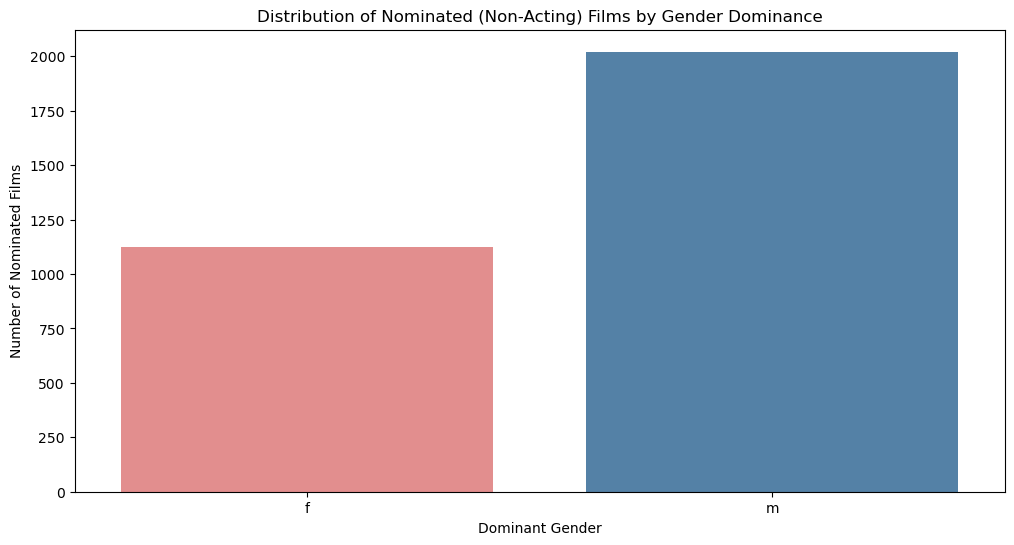

In [ ]:
# Distribution of Nominated Films by Gender Dominance
plt.figure(figsize=(12, 6))
sns.countplot(
    data=oscars_other,
    x="dominant_gender",
    palette={"m": "steelblue", "f": "lightcoral"},
    hue="dominant_gender"
)
plt.title("Distribution of Nominated Films (Non-Acting) by Gender Dominance")
plt.xlabel("Dominant Gender")
plt.ylabel("Number of Nominated Films")
plt.show()

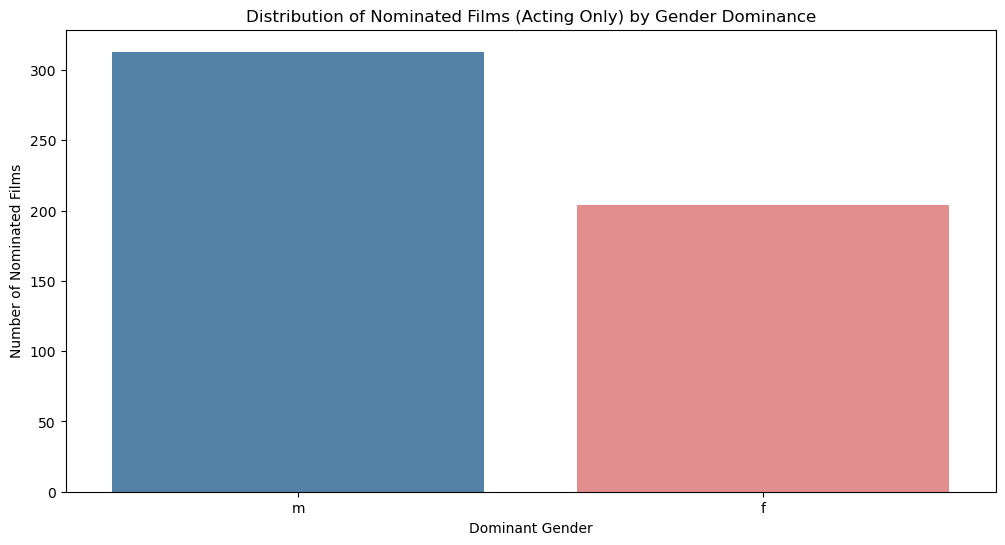

In [278]:
# Distribution of Nominated Films by Gender Dominance
plt.figure(figsize=(12, 6))
sns.countplot(
    data=oscars_acting,
    x="dominant_gender",
    palette={"m": "steelblue", "f": "lightcoral"},
    hue="dominant_gender"
)
plt.title("Distribution of Nominated Films (Acting Only) by Gender Dominance")
plt.xlabel("Dominant Gender")
plt.ylabel("Number of Nominated Films")
plt.show()

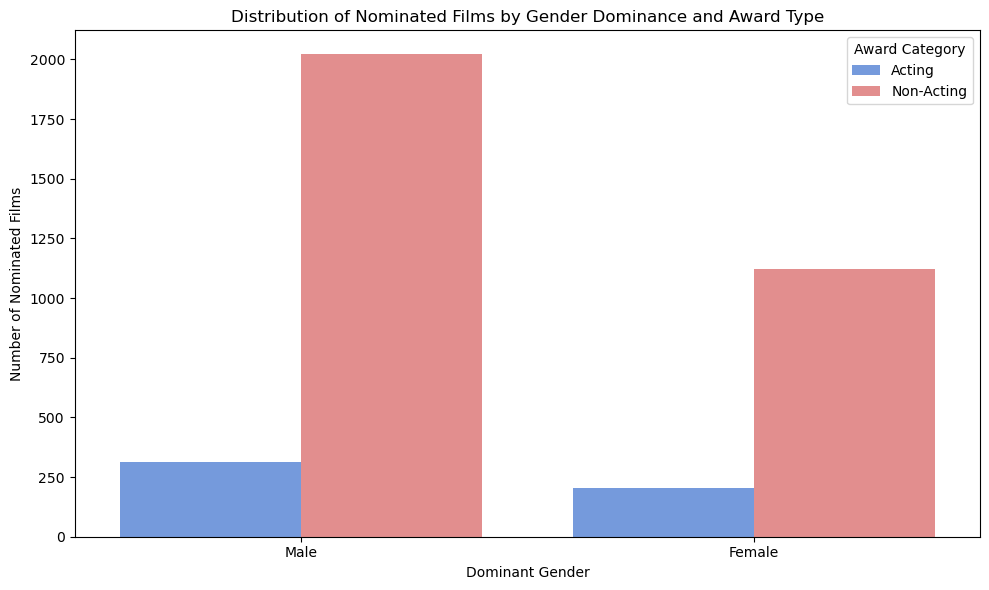

In [306]:
# 1. Add a new column to distinguish the two datasets
oscars_acting.loc[:, "category"] = "Acting"
oscars_other.loc[:, "category"] = "Non-Acting"

# 2. Combine them into one DataFrame
oscars_combined = pd.concat([oscars_acting, oscars_other], ignore_index=True)

# 3. Plot a grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(
    data=oscars_combined,
    x="dominant_gender",
    hue="category",
    palette={"Acting": "cornflowerblue", "Non-Acting": "lightcoral"}
)

plt.title("Distribution of Nominated Films by Gender Dominance and Award Type")
plt.xlabel("Dominant Gender")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.ylabel("Number of Nominated Films")
plt.legend(title="Award Category")
plt.tight_layout()
plt.show()

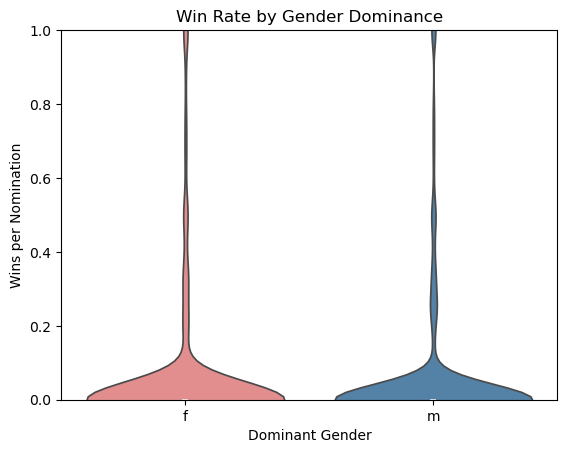

In [289]:
# Plot if female- or male-dominant films tend to convert nominations into wins more often
other_summary["win_rate"] = (
    other_summary["total_wins"] / other_summary["total_nominations"].replace(0, np.nan)
).fillna(0)

sns.violinplot(
    data=other_summary,
    x="dominant_gender",
    y="win_rate",
    palette={"m": "steelblue", "f": "lightcoral"},
    hue="dominant_gender"
)

plt.title("Win Rate by Gender Dominance")
plt.ylim(0, 1)
plt.xlabel("Dominant Gender")
plt.ylabel("Wins per Nomination")
plt.show()

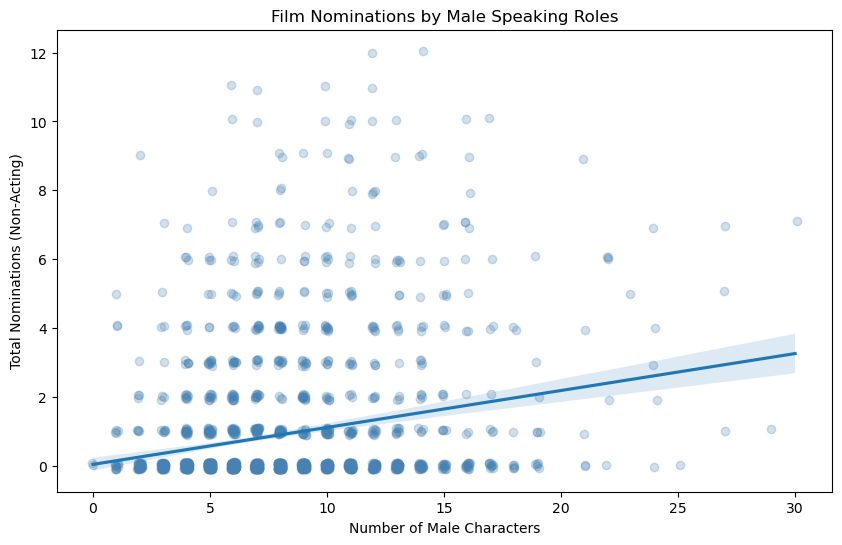

In [338]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=other_summary,
    x="num_characters_m",
    y="total_nominations",
    x_jitter=0.1,
    y_jitter=0.1,
    scatter_kws={"alpha": 0.25, "color": "steelblue"}
)

plt.title("Film Nominations by Male Speaking Roles")
plt.xlabel("Number of Male Characters")
plt.ylabel("Total Nominations (Non-Acting)")
plt.show()

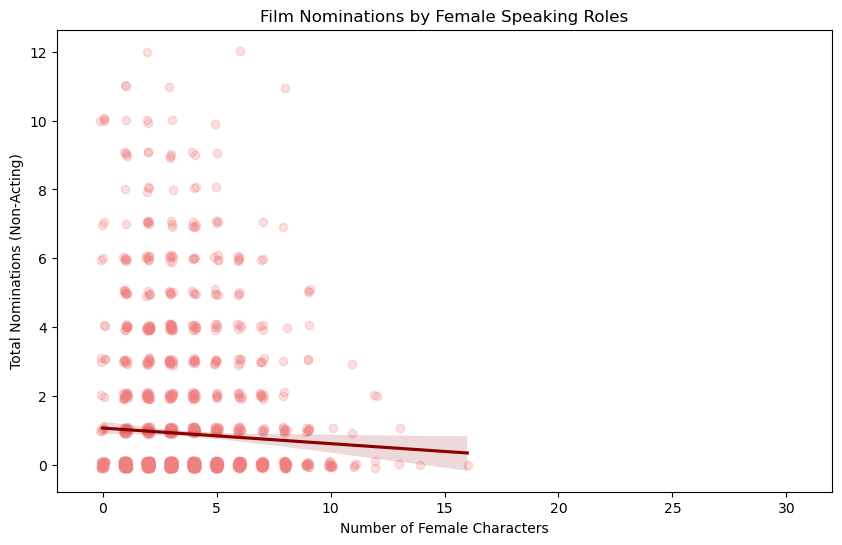

In [342]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=other_summary,
    x="num_characters_f",
    y="total_nominations",
    x_jitter=0.1,
    y_jitter=0.1,
    scatter_kws={"alpha": 0.25, "color": "lightcoral"},
    line_kws={"color": "darkred"}
)

plt.title("Film Nominations by Female Speaking Roles")
plt.xlabel("Number of Female Characters")
plt.xlim(-2, 32)
plt.ylabel("Total Nominations (Non-Acting)")
plt.show()

In [ ]:
rt_summary = gender_rt.groupby(["title", "year", "dominant_gender"], observed=True).agg(
    total_nominations=("award", lambda x: x.notna().sum()),
    total_wins=("winner", "sum")
).reset_index()

rt_summary = gender_rt.merge(rt_summary, on=["title", "year", "dominant_gender"], how="left").drop_duplicates(subset=["title", "year"])
rt_summary = rt_summary.fillna({"total_nominations": 0, "total_wins": 0})